## Import 

In [1]:
from PIL import ImageEnhance
from PIL import Image
import os
import sys
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import fftpack
import pyfits
import pylab as py
from pandas import Series
from matplotlib import pyplot
import cv2
from scipy import signal
from scipy.ndimage.filters import convolve
import tensorflow as tf
from math import*
from decimal import Decimal

%matplotlib inline

/usr/lib/python2.7/dist-packages/gtk-2.0/gtk/__init__.py:57: GtkWarning: could not open display
  warnings.warn(str(e), _gtk.Warning)


## Load train data

In [2]:
train = pd.read_json('./train.json')
train.head(15)

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878361, -27.15416, -28.668615, -29.537971...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920305, -14.920363, -12.66633...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0
5,"[-20.769371, -20.769434, -25.906025, -25.90602...","[-29.288746, -29.712593, -28.884804, -28.88480...",b51d18b5,36.9034,1
6,"[-26.673811, -23.666162, -27.622442, -28.31768...","[-24.557735, -26.97868, -27.622442, -29.073456...",31da1a04,34.4751,1
7,"[-24.989119, -27.755224, -25.817074, -24.98927...","[-27.755173, -26.732174, -28.124943, -31.83772...",56929c16,41.1769,0
8,"[-17.146641, -17.146572, -17.994583, -19.44553...","[-25.733608, -24.472507, -24.710424, -22.77215...",525ab75c,35.7829,0
9,"[-24.020853, -23.551275, -27.18819, -29.126434...","[-28.702518, -33.563324, -29.571918, -29.12643...",192f56eb,43.3007,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 0 to 1603
Data columns (total 5 columns):
band_1        1604 non-null object
band_2        1604 non-null object
id            1604 non-null object
inc_angle     1604 non-null object
is_iceberg    1604 non-null int64
dtypes: int64(1), object(4)
memory usage: 75.2+ KB


## Load test data

In [4]:
test = pd.read_json('./test.json')
test.head()

,band_1,band_2,id,inc_angle
0,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",5941774d,34.966400
1,"[-26.0589694977, -26.0589694977, -26.058969497...","[-25.7542076111, -25.7542076111, -25.754207611...",4023181e,32.615072
2,"[-14.1410999298, -15.0642414093, -17.375520706...","[-14.745639801, -14.5904102325, -14.3626976013...",b20200e4,37.505433
3,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",e7f018bb,34.473900
4,"[-23.3745937347, -26.0271816254, -28.121963501...","[-25.7223434448, -27.0115776062, -23.149162292...",4371c8c3,43.918874


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8424 entries, 0 to 8423
Data columns (total 4 columns):
band_1       8424 non-null object
band_2       8424 non-null object
id           8424 non-null object
inc_angle    8424 non-null float64
dtypes: float64(1), object(3)
memory usage: 329.1+ KB


## Data shape

In [6]:
train['band_1'].shape


(1604,)

In [7]:
test['band_1'].shape

(8424,)

In [8]:
train.inc_angle = train.inc_angle.apply(lambda x: np.nan if x == 'na' else x)
train.inc_angle[0]

43.923900000000003

## Display HH, HV, Color Composite for image[0]

(2,)
(75, 75, 2)


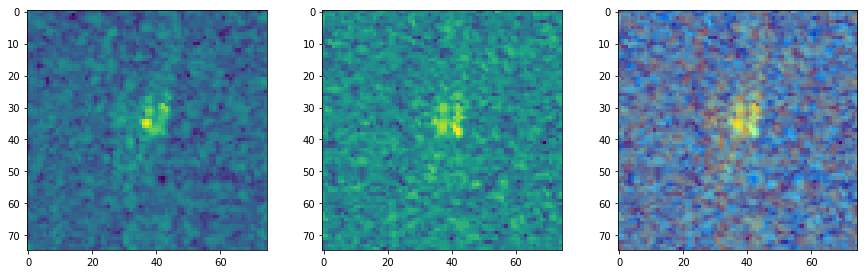

In [9]:
# get first image info
img1 = train.loc[53, ['band_1', 'band_2']]
print img1.shape

img1 = np.stack([img1['band_1'], img1['band_2']], -1).reshape(75, 75, 2)
print img1.shape

r = img1[:, :, 0]
r = (r + abs(r.min())) / np.max((r + abs(r.min())))

g = img1[:, :, 1]
g = (g + abs(g.min())) / np.max(g + abs(g.min()))

b = img1[:, :, 0] / img1[:, :, 1]
b = (((b) / np.max(b)) + abs((b) / np.max(b))) / np.max((((b) / np.max(b)) + abs((b) / np.max(b))))

img_list = [img1[:, :, 0], img1[:, :, 1], np.dstack((r, g, b))]

fig = plt.figure(1,figsize=(15,15))
for i in range(3):
    ax = fig.add_subplot(3,3,i+1)
    arr = img_list[i]
    ax.imshow(arr)
    
plt.show()

## Remove noise

In [10]:
def denoise(img, weight=0.1, eps=1e-3, num_iter_max=200):
    u = np.zeros_like(img)
    px = np.zeros_like(img)
    py = np.zeros_like(img)
    
    nm = np.prod(img.shape[:2])
    tau = 0.125
    
    i = 0
    while i < num_iter_max:
        u_old = u
        
        # x and y components of u's gradient
        ux = np.roll(u, -1, axis=1) - u
        uy = np.roll(u, -1, axis=0) - u
        
        # update the dual variable
        px_new = px + (tau / weight) * ux
        py_new = py + (tau / weight) * uy
        norm_new = np.maximum(1, np.sqrt(px_new **2 + py_new ** 2))
        px = px_new / norm_new
        py = py_new / norm_new

        # calculate divergence
        rx = np.roll(px, 1, axis=1)
        ry = np.roll(py, 1, axis=0)
        div_p = (px - rx) + (py - ry)
        
        # update image
        u = img + weight * div_p
        
        # calculate error
        error = np.linalg.norm(u - u_old) / np.sqrt(nm)
        
        if i == 0:
            err_init = error
            err_prev = error
        else:
            # break if error small enough
            if np.abs(err_prev - error) < eps * err_init:
                break
            else:
                e_prev = error
                
        # don't forget to update iterator
        i += 1

    return u

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


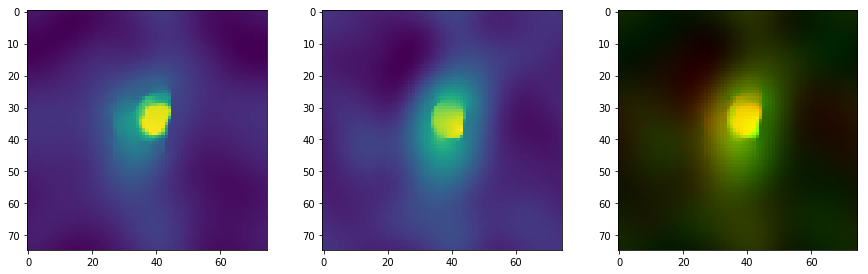

In [11]:
r = denoise(img1[:, :, 0], weight=10)
r = (r + abs(r.min())) / np.max((r + abs(r.min())))

g = denoise(img1[:, :, 1], weight=10)
g = (g + abs(g.min())) / np.max(g + abs(g.min()))

b = r / g
b = (((b) / np.max(b)) + abs((b) / np.max(b))) / np.max((((b) / np.max(b)) + abs((b) / np.max(b))))

# plt.imshow(np.dstack((r, g, b)))

img_list = [r,g, np.dstack((r, g, b))]

fig = plt.figure(1,figsize=(15,15))
for i in range(3):
    ax = fig.add_subplot(3,3,i+1)
    arr = img_list[i]
    # ax.imshow(arr, cmap='viridis')
    ax.imshow(arr)
    
plt.show()

## Compute FFT

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


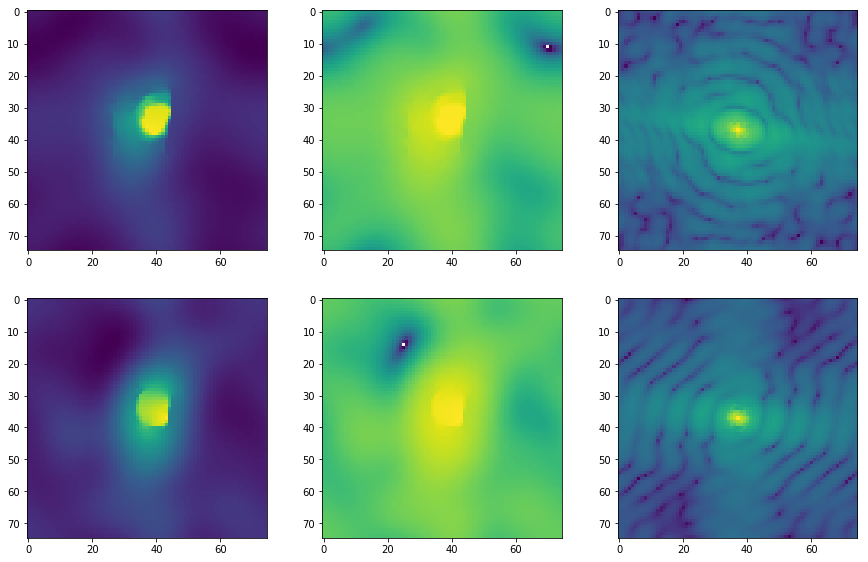

In [12]:
def fft(img):
    # Take the fourier transform of the image.
    F1 = fftpack.fft2(img)
 
    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2 = fftpack.fftshift( F1 )
 
    # Calculate a 2D power spectrum
    psd2D = np.abs( F2 )**2
    return psd2D
    
psd2D_1 = fft(r)
psd2D_2 = fft(g)

# print np.log10( psd2D_1 )

img_list = [r, np.log10( r ),np.log10( psd2D_1 ), g, np.log10( g ),np.log10( psd2D_2 )]

fig = plt.figure(1,figsize=(15,15))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arr = img_list[i]
    # ax.imshow(arr, cmap='viridis')
    ax.imshow(arr)
    
plt.show()


## Color Composite

In [13]:
def color_composite(data):
    rgb_arrays = []
    for i, row in data.iterrows():
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = band_1 / band_2

        r = (band_1 + abs(band_1.min())) / np.max((band_1 + abs(band_1.min())))
        g = (band_2 + abs(band_2.min())) / np.max((band_2 + abs(band_2.min())))
        b = (band_3 + abs(band_3.min())) / np.max((band_3 + abs(band_3.min())))

        rgb = np.dstack((r, g, b))
        rgb_arrays.append(rgb)
    return np.array(rgb_arrays)

In [14]:
rgb_train = color_composite(train)

In [15]:
rgb_test = color_composite(test)

In [16]:
rgb_train.shape

(1604, 75, 75, 3)

In [17]:
train.shape

(1604, 5)

In [18]:
rgb_test.shape

(8424, 75, 75, 3)

In [19]:
test.shape

(8424, 4)

Looking at random ships


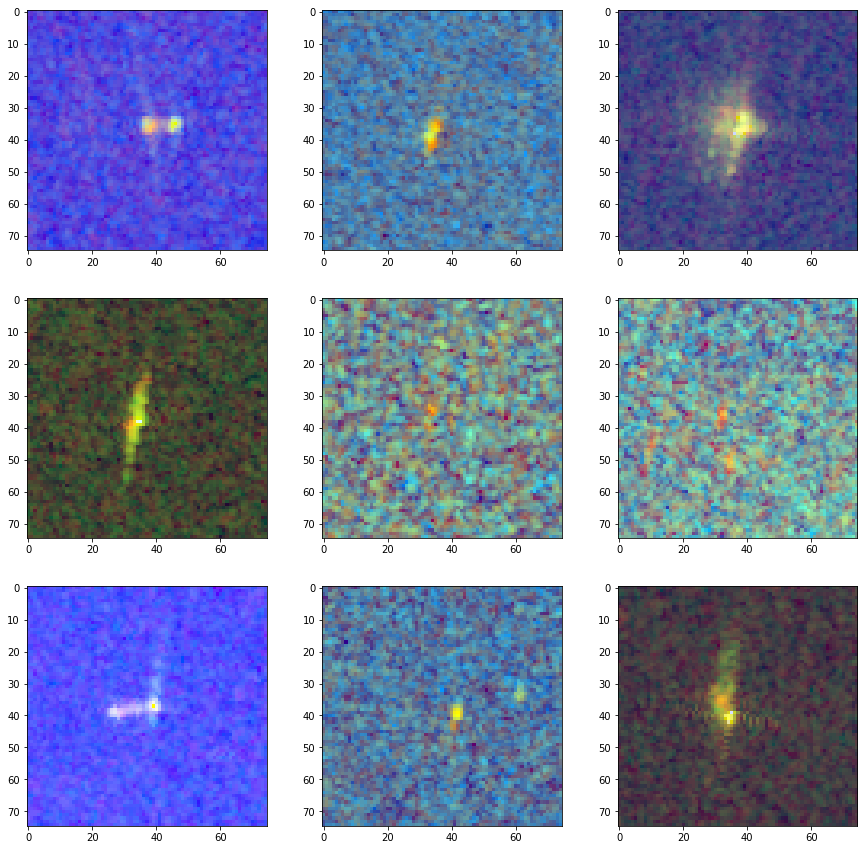

In [20]:
# look at random ships
print('Looking at random ships')
ships = np.random.choice(np.where(train.is_iceberg ==0)[0], 9)
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = rgb_train[ships[i], :, :]
    ax.imshow(arr)
    
plt.show()

Looking at random icebergs


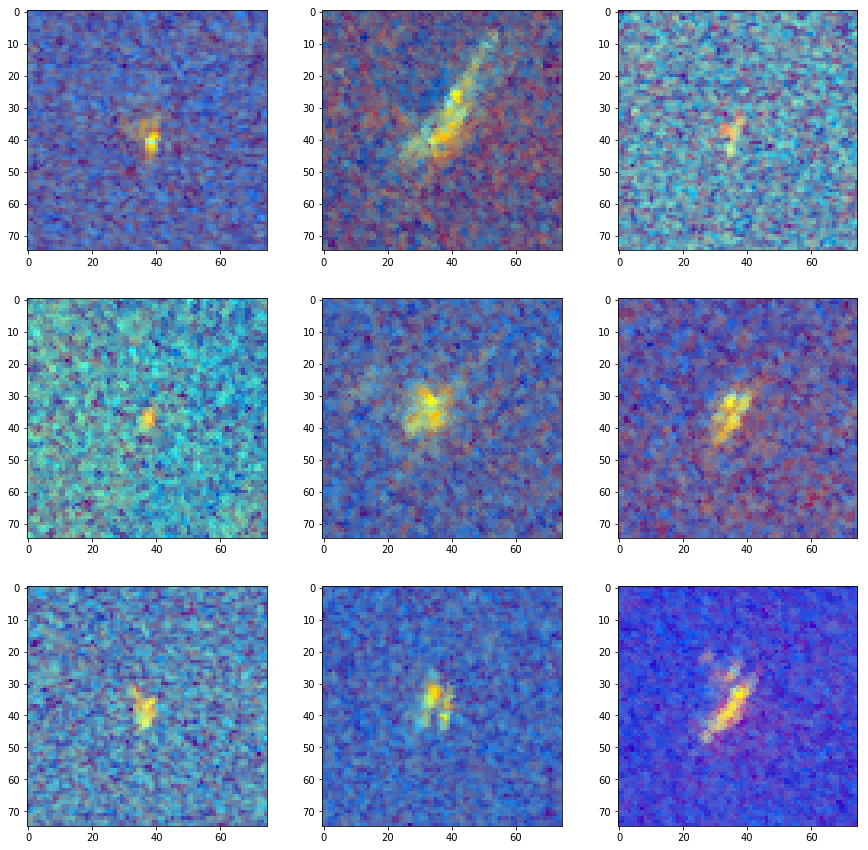

In [21]:
# look at random icebergs
print('Looking at random icebergs')
icebergs = np.random.choice(np.where(train.is_iceberg ==1)[0], 9)
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = rgb_train[icebergs[i], :, :]
    ax.imshow(arr)
    
plt.show()


Looking at random test images


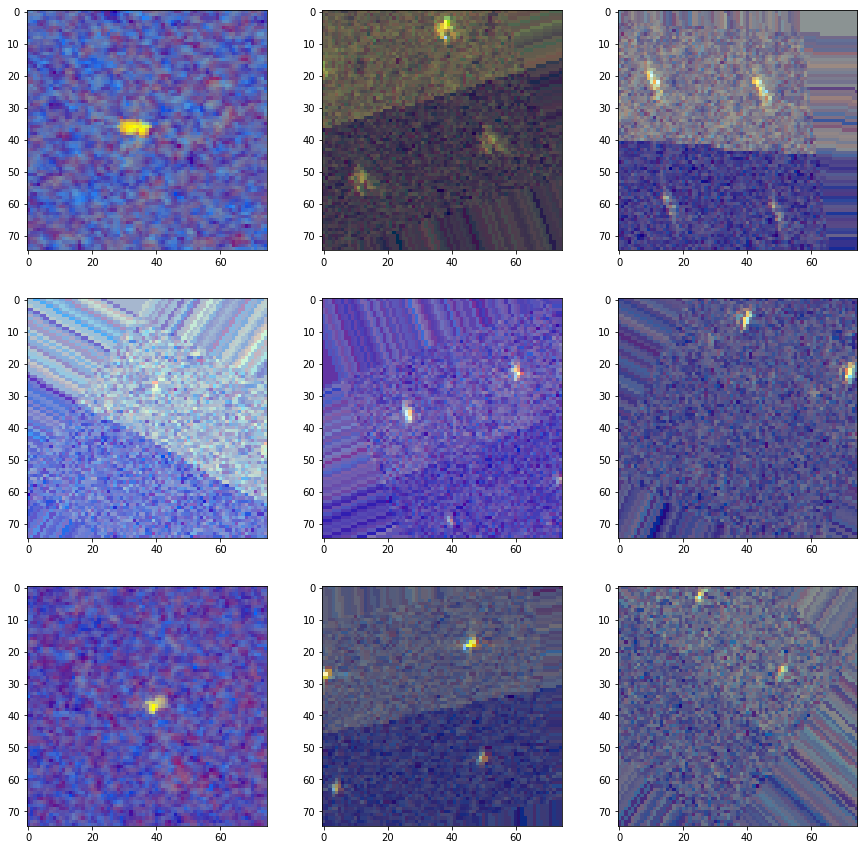

In [22]:
# TEST SAMPLES
idx = np.random.choice(range(0, len(test)), 9)
test_img = color_composite(test.iloc[idx])

# look at random icebergs
print('Looking at random test images')
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = test_img[i, :, :]
    ax.imshow(arr)
    
plt.show()


# Plot image as a Series

## Normal images

### Band_1

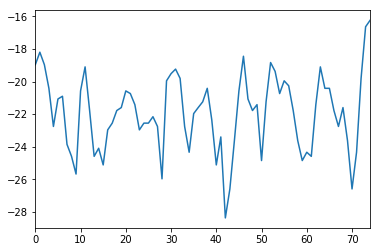

In [23]:
my_list = map(lambda x: x[0], img1[:, :, 0])
series = pd.Series(my_list)

series.plot()
pyplot.show()

### Band_2

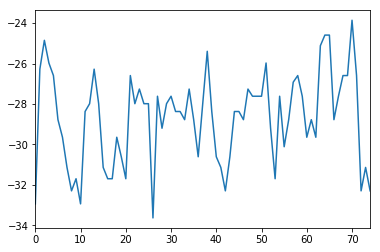

In [24]:
my_list = map(lambda x: x[0], img1[:, :, 1])
series = pd.Series(my_list)

series.plot()
pyplot.show()

### Denoise Band_1

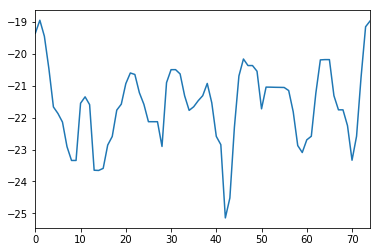

In [25]:
my_list = map(lambda x: x[0], denoise(img1[:, :, 0], weight=1))
series = pd.Series(my_list)

series.plot()
pyplot.show()

### Denoise Band_2

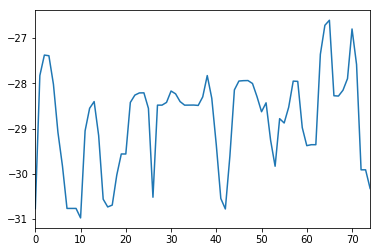

In [26]:
my_list = map(lambda x: x[0], denoise(img1[:, :, 1], weight=1))
series = pd.Series(my_list)

series.plot()
pyplot.show()

## Histogram band_1

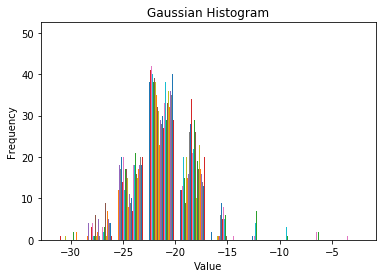

In [27]:
plt.hist(img1[:, :, 0])
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()

## Histogram band_2

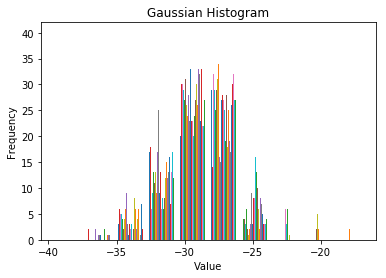

In [28]:
plt.hist(img1[:, :, 1])
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()

## FFT images

### Band_1

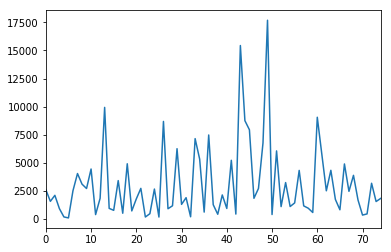

In [29]:
my_list = map(lambda x: x[0], fft(img1[:, :, 0]))
series = pd.Series(my_list)

# print (img1[:, :, 0]).shape
# print (fft(img1[:, :, 0])).shape

series.plot()
pyplot.show()

### Band_2

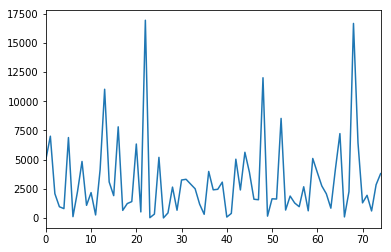

In [30]:
my_list = map(lambda x: x[0], fft(img1[:, :, 1]))
series = pd.Series(my_list)

series.plot()
pyplot.show()

# Similarity Tests

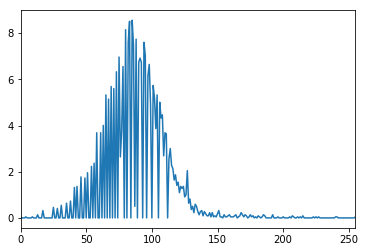

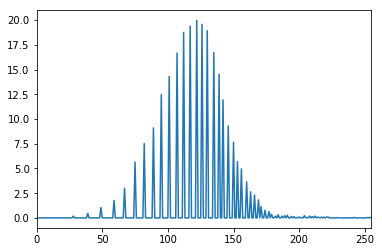

('Distance normal: ', 63.085426576733198)
('Intersection normal: ', 1159835.4003031868)
('Distance fft: ', 2.9313410240712649e-05)
('Intersection fft: ', 1.0)
('Manhattan distance: ', 807.541387362553)
('Minkowski distance: ', 3.486)
('Cosine similarity: ', 0.96)
('Jaccard similarity: ', 0.0004253509145044662)


In [42]:
def histogram_intersection(h1, h2, bins):
   bins = np.diff(bins)
   sm = 0
   for i in range(len(bins)):
       sm += min(bins[i]*h1[i], bins[i]*h2[i])
   return sm

def manhattan_distance(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))
 
def nth_root(value, n_root):
    root_value = 1/float(n_root)
    return round (Decimal(value) ** Decimal(root_value),3)
 
def minkowski_distance(x,y,p_value):
     return nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),p_value)
    
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
 
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)    

def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# get image (i.e. #53)
img1 = train.loc[53, ['band_1', 'band_2']]
img1 = np.stack([img1['band_1'], img1['band_2']], -1).reshape(75, 75, 2)

band1 = img1[:, :, 0]
band1 = (band1 + abs(band1.min())) / np.max((band1 + abs(band1.min())))

band2 = img1[:, :, 1]
band2 = (band2 + abs(band2.min())) / np.max(band2 + abs(band2.min()))

fft_band1 = fft(band1)
fft_band2 = fft(band2)

hband1, hbins = np.histogram(band1, bins=256, normed=True)
hband2, hbins = np.histogram(band2, bins=256, normed=True)

fft_hband1, hbins = np.histogram(fft_band1, bins=256, normed=True)
fft_hband2, hbins = np.histogram(fft_band2, bins=256, normed=True)

hist_band1 = np.array([hband1]).ravel()
series_band1 = pd.Series(hist_band1)
hist_band2 = np.array([hband2]).ravel()
series_band2 = pd.Series(hist_band2)

fft_hist_band1 = np.array([fft_hband1]).ravel()
fft_series_band1 = pd.Series(fft_hist_band1)
fft_hist_band2 = np.array([fft_hband2]).ravel()
fft_series_band2 = pd.Series(fft_hist_band2)

series_band1.plot()
pyplot.show()

series_band2.plot()
pyplot.show()

diff = series_band1 - series_band2
distance = np.sqrt(np.dot(diff, diff))
print ('Distance normal: ', distance)

inter = histogram_intersection(hband1, hband2, hbins)
print ('Intersection normal: ', inter)

diff = fft_series_band1 - fft_series_band2
distance = np.sqrt(np.dot(diff, diff))
print ('Distance fft: ', distance)

inter = histogram_intersection(fft_hband1, fft_hband2, hbins)
print ('Intersection fft: ', inter)

manhattan = manhattan_distance(np.array([band1]).ravel(),np.array([band2]).ravel())
print ('Manhattan distance: ', manhattan)

minkowski = minkowski_distance(np.array([band1]).ravel(),np.array([band2]).ravel(), 3)
print ('Minkowski distance: ', minkowski)

cos_simil = cosine_similarity(np.array([band1]).ravel(),np.array([band2]).ravel())
print ('Cosine similarity: ', cos_simil)

jaccard_simil = jaccard_similarity(np.array([band1]).ravel(),np.array([band2]).ravel())
print ('Jaccard similarity: ', jaccard_simil)



